In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gedsk

In [2]:
from freeqdsk import geqdsk

In [3]:
import scipy.integrate as spi

### Field Following Separatrix Curve Generation Algorithm
#### Introduction
What is Separatrix Curve: Each poloidal field has some saddle points, and the separatrix curve is simply the contour curve, i.e. the points that have the same value of Psi as the saddle point is called the separatrix curve. So, it is very easy to get the separatrix curve by using the contour plot of Psi and this is done in the allCriPoints.ipynb file.

But now, we will use another method to compute the separatrix curve. And it is called the field following method.

#### Field Following Method
The terminologies:

$B$ = Magnetic field <br>
$\psi$ = $B.S$ = Magnetic flux ($Wb$) but in geqdsk file it's $Wb/rad$. <br>
$I$ = plasma current ($A$)<br>
$I_{pol}$ = poloidal current ($A$)<br>

$B_r$ = $-\frac{1}{R} \frac{\partial \psi}{\partial z}$ <br>
$B_z$ = $\frac{1}{R} \frac{\partial \psi}{\partial R}$ <br>
$B_t$ = $\frac{I_{pol}}{R}$ 

$I_{pol}$ is given as a 1D array in the geqdsk file.
<br>

This is described in more detail in Usman's thesis. (available in the TOMMS box folder)


#### Download file if needed

In [4]:
# dowlnoad the geqdsk file
import urllib.request
url = "https://raw.githubusercontent.com/SCOREC/Fusion_Public/master/samples/nstx_132588_v4/g132588.00650"
with urllib.request.urlopen(url) as response:
    with open("download/g132588.00650", 'wb') as f:
        f.write(response.read())

##### Choose the file

In [5]:
# get the data from the file
#filename = r"D:\Codes\AllSamples\N-g127975.00430\g127975.00430"
#filename = "geqdsks\ITER_10MA.geqdsk"
#filename = r"D:\Codes\AllSamples\D-g096333.03337\g096333.03337"
filename = r"D:\Codes\AllSamples\nstx_132588_v4\g132588.00650"
filename = "download/g132588.00650"

In [6]:

data = gedsk.read_gedsk(filename)
wall_points = gedsk.get_wall_points(filename)
psi = gedsk.get_psi(data)
if wall_points is not None:
    print("Wall points found")
else:
    print("Wall points not found")

Wall points found


In [7]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
xx, yy = gedsk.get_meshgrid_for_psi(data)
spline = gedsk.get_spline_for_psi(psi, x, y)

In [8]:
lims = data['rlim'], data['zlim']
lims

(array([0.1851, 0.1851, 0.2794, 0.2794, 0.2979, 0.5712, 0.5712, 0.617 ,
        1.194 , 1.0433, 1.3192, 1.3358, 1.4851, 1.4791, 1.5174, 1.5313,
        1.5464, 1.5608, 1.567 , 1.5657, 1.5543, 1.5341, 1.5181, 1.4818,
        1.4851, 1.3358, 1.3192, 1.0433, 1.194 , 0.617 , 0.5712, 0.5712,
        0.2979, 0.2794, 0.2794, 0.1851, 0.1851, 0.1851]),
 array([ 0.    ,  1.0081,  1.1714,  1.578 ,  1.6034,  1.6034,  1.628 ,
         1.628 ,  1.401 ,  1.43  ,  1.0397,  0.9976,  0.545 ,  0.4995,
         0.306 ,  0.2355,  0.1586,  0.0801,  0.    , -0.0177, -0.1123,
        -0.221 , -0.3026, -0.486 , -0.545 , -0.9976, -1.0397, -1.43  ,
        -1.401 , -1.628 , -1.628 , -1.6034, -1.6034, -1.578 , -1.1714,
        -1.0081,  0.    ,  0.    ]))

In [9]:
# now get all the critical points and sort them
all_critical_points = gedsk.find_all_critical_points_using_root(spline, bounds,nx=20, ny=20, method='hybr')

# sort the critical points without using the wall points
sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds, None)

# sort the critical points using the wall points
sorted_points_with_wall = gedsk.sort_critical_points(all_critical_points, spline, bounds, lims=lims)

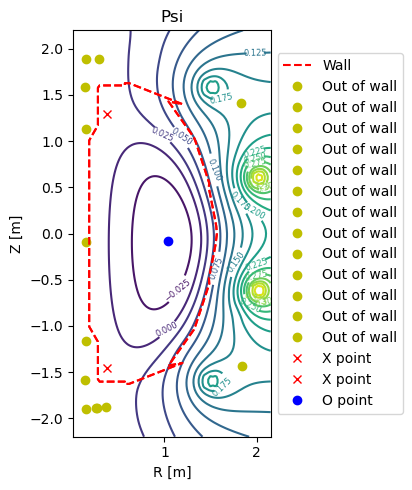

In [10]:
fig, ax = gedsk.plot_sorted_points_with_contour_with_wall(psi, xx, yy, sorted_points_with_wall, filename)
ax.plot(lims[0], lims[1], 'r--')
plt.show()

In [11]:
# get the maximum error betweeen spline and the actual psi

# first get the values of psi at all the grid points
psi_values = spline.ev(xx, yy)

# now get the maximum error
max_error = np.max(np.abs(psi_values - psi))
print("Maximum error between spline and psi: ", max_error)

Maximum error between spline and psi:  2.220446049250313e-16


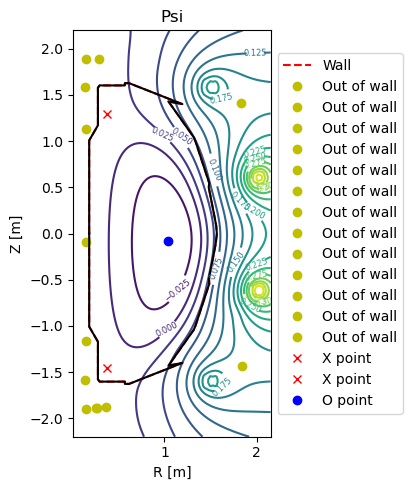

In [13]:
fig, ax = gedsk.plot_sorted_points_with_contour_with_wall(psi_values, xx, yy, sorted_points_with_wall, filename)
ax.plot(lims[0], lims[1], 'k')
plt.show()

#### The Algorithm
Now we have everything to compute the separatrix curve. Now we will use the field following method to compute the separatrix curve.

In [14]:
sorted_points_with_wall

{'out_of_wall': [(0.15281917809519452, -1.8974665211322421),
  (0.2923535634664241, 1.8929470133383435),
  (0.1491360949023002, -0.0910434736555435),
  (1.827565174074024, 1.4106780629312081),
  (0.3656539433878031, -1.8806332213824843),
  (0.15303431378317975, 1.8903972532910809),
  (0.2723577207609435, -1.8913130926199462),
  (0.1542985219902597, 1.1366029715023294),
  (0.13593872097888904, 1.5839777920391294),
  (0.26407630092974727, -1.891193167462459),
  (0.13697231486357359, -1.5909596610874606),
  (0.15177810242215764, -1.160724726911625),
  (1.8370052516398578, -1.4388573125557007)],
 'saddle': [(0.3788191392029089, 1.29527388742515),
  (0.376016889308171, -1.4591119134083306)],
 'minimum': [(1.0356721235027655, -0.08263432670861574)]}

# create a function that takes the value of psi and normalizes it to 0 to 1
def psi_norm(psivalue):
    global sorted_points_with_wall
    global spline
    x_point = sorted_points_with_wall['saddle'][0]
    minimum_point = sorted_points_with_wall['minimum'][0]
    max_psi = spline(x_point[0], x_point[1])[0][0]
    min_psi = spline(minimum_point[0], minimum_point[1])[0][0]
    # if psivalue is outside the range of psi, change it to the maximum or minimum value
    print("Max psi: ", max_psi)
    print("Min psi: ", min_psi)
    print("Psi value: ", psivalue)
    return (psivalue - min_psi) / (max_psi - min_psi)

# create a get_pol_current function that takes the value of psi and returns the value of the poloidal current at that point
def get_pol_current(psivalue):
    norm_psi = psi_norm(psivalue)
    return fpol(norm_psi)

In [15]:
# get the maximum and minimum of psi and plot the poloidal current
x_point = sorted_points_with_wall['saddle'][1]
o_point = sorted_points_with_wall['minimum'][0]
x_point, o_point

((0.376016889308171, -1.4591119134083306),
 (1.0356721235027655, -0.08263432670861574))

In [16]:
# get the maximum and minimum of psi
max_psi = spline(x_point[0], x_point[1])[0][0]
min_psi = spline(o_point[0], o_point[1])[0][0]
max_psi, min_psi

(0.012397699771564116, -0.04741632291443854)

In [17]:
# get the ipol 1D array and generate the ipol function using interp1d
ipol = data['fpol']

# create a linear interpolation function using the ipol array and map from 0 to 1
# the function gets value from 0 to 1 and returns the value of the ipol at that point
def fpol(x, min_psi, max_psi):
    global ipol
    x = np.clip(x, min_psi, max_psi)
    return np.interp(x, np.linspace(min_psi, max_psi, len(ipol)), ipol)

In [18]:
# create function to get q for a given psi
qpsi = data['qpsi']
def fq(psi, qpsi, min_psi, max_psi):
    psi = np.clip(psi, min_psi, max_psi)
    return np.interp(psi, np.linspace(min_psi, max_psi, len(qpsi)), qpsi)

In [19]:
# create a lambda function for fq that only needs psi
fqpsi = lambda psi: fq(psi, qpsi, min_psi, max_psi)

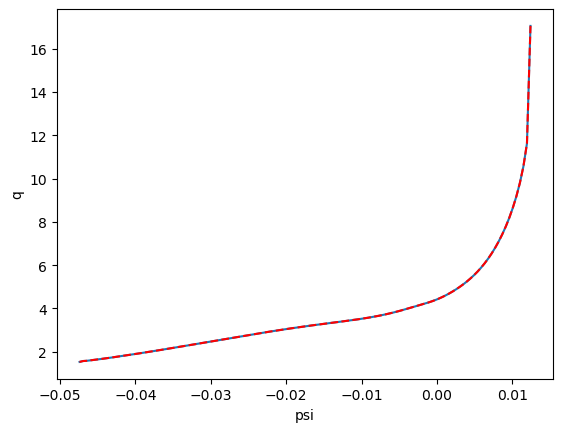

In [34]:
#plot qpsi
plt.plot(np.linspace(min_psi, max_psi, len(qpsi)), qpsi)
xpsi = np.linspace(min_psi, max_psi, len(qpsi))
plt.plot(xpsi, fqpsi(xpsi), 'r--')
plt.xlabel("psi")
plt.ylabel("q")
plt.show()

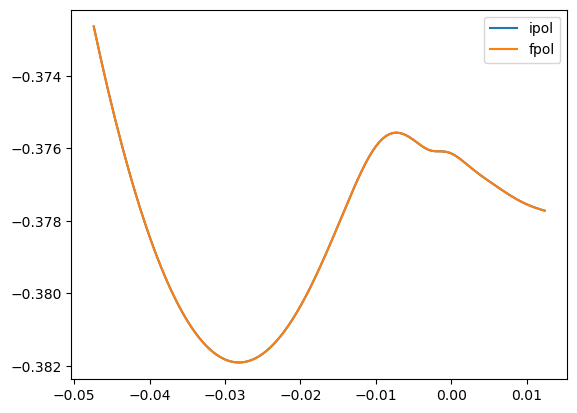

In [22]:
# plot fpol
x = np.linspace(min_psi, max_psi, len(ipol))
plt.plot(x, ipol, label='ipol')
plt.plot(x, fpol(x, min_psi, max_psi), label='fpol')
plt.legend()
plt.show()

### Now do the Line Integrals

In [23]:
def get_dls(t, y, spline, min_psi, max_psi):
    R, Z = y
    #global spline
    dpsidz = - spline(R, Z, dx=0, dy=1)[0][0]
    dpsidr = spline(R, Z, dx=1, dy=0)[0][0]
    psi = spline(R, Z)[0][0]
    I = fpol(psi, min_psi, max_psi)
    return (dpsidz * R) / I, (dpsidr * R) / I


__Interesting:__ Multiplying by R doesn't change the field line. Because it's just controlling
the length of the field line. It is important for the mesh generation because we need to know
the position of a point on the field line based on the displacement in the $\phi$ direction.

**$\frac{d\psi}{L_R} = -\frac{1}{I_{pol}}\frac{d\psi}{dz}$**, not positive.

In [24]:
# now do the integration of the dls and plot the field lines
R0 = sorted_points_with_wall['saddle'][1][0]
Z0 = sorted_points_with_wall['saddle'][1][1]

In [25]:
R0, Z0

(0.376016889308171, -1.4591119134083306)

In [26]:
# make a lambda function for the get_dls function called dls
# it just take t and y as input and returns get_dls(t, y, spline, min_psi, max_psi)
dls = lambda t, y: get_dls(t, y, spline, min_psi, max_psi)

In [42]:
def get_field_lines(R0, Z0, dls, ax, q):
    sol = spi.solve_ivp(dls, (0, q*2*np.pi), (R0, Z0), t_eval=np.linspace(0, q*2*np.pi, 20))
    r, z = sol.y
    ax.plot(r, z, 'r.-', linewidth=0.5, markersize=1)
    # plot the starting point
    ax.plot(R0, Z0, 'bx', label='%0.2f, %0.2f' % (R0, Z0))
    # equal aspect ratio
    ax.set_aspect('equal')

##### This shows that the algorithm is giving the correct results.

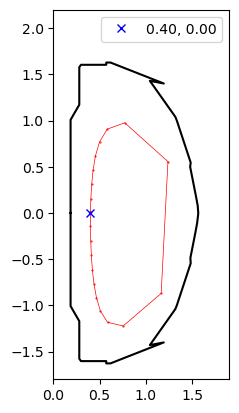

In [43]:
# create a figure and axis
fig, ax = plt.subplots()

q_04_0 = fqpsi(spline(0.4, 0)[0][0])

get_field_lines(0.4, 0, dls, ax, q_04_0)
#get_field_lines(1.4, 0, dls, ax)

# plot with contour
#ax.contour(xx, yy, psi, levels=[spline(0.4, 0)[0][0]])

ax.plot(lims[0], lims[1], 'k')


plt.legend()

plt.xlim(0, 1.9)  # Set x-axis limits
plt.ylim(-1.8, 2.2)  # Set y-axis limits

plt.show()

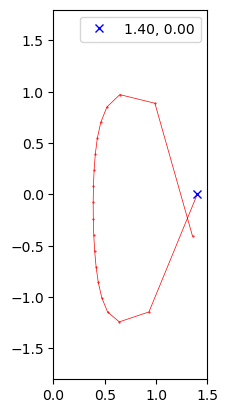

In [45]:
# create a figure and axis
fig, ax = plt.subplots()

q_14_0 = fqpsi(spline(1.4, 0)[0][0])

get_field_lines(1.4, 0, dls, ax, q_14_0)

#ax.plot(lims[0], lims[1], 'k')

ax.set_xlim(0, 1.5)
ax.set_ylim(-1.8, 1.8)
plt.legend()


plt.show()

##### Investigating when the starting point is a saddle point.

**Notes:**
- $\frac{dL}{dt}$ are very small (~$10^{-14}$) and it's not allowing the field line to move.
- $I$ is in boundary but the fpol fucntion is giving proper values.
- Multiplying the $dL$ components by large numbers are not helping.

#### Make an animation of the field line following/growing

In [26]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


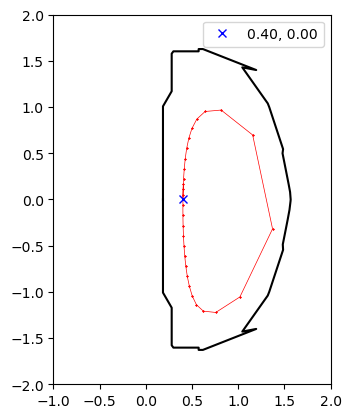

In [40]:
# try to plot before writing the animation
r0, z0 = 0.4, 0
i = range(2, 30)
fig, ax = plt.subplots()
ax.set_xlim(0, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
for i in range(2, 30):
    sol = spi.solve_ivp(dls, (0, 30), (r0, z0), t_eval=np.linspace(0, i, i))
    r, z = sol.y
    ax.clear()
    ax.set_xlim(-1, 2)
    ax.set_ylim(-2, 2)
    ax.plot(lims[0], lims[1], 'k')
    ax.plot(r, z, 'rx-', linewidth=0.5, markersize=1)
    # plot the starting point
    ax.plot(r0, z0, 'bx', label='%0.2f, %0.2f' % (r0, z0))
    # set limits
    # equal aspect ratio
    #plt.axis('equal')
    plt.legend()
    # write to file
    plt.savefig('animation/field_lines_%d.png' % i)
    

In [43]:
def x_get_dls(t, y, spline, min_psi, max_psi, R0, Z0):
    R, Z = y
    
    # calculate the distance from the starting point
    dist = np.sqrt((R - R0)**2 + (Z - Z0)**2)


    dpsidz = - spline(R, Z, dx=0, dy=1)[0][0]
    dpsidr = spline(R, Z, dx=1, dy=0)[0][0]
    #print("dpsidz, dpsidr: ", dpsidz, dpsidr)
    psi = spline(R, Z)[0][0]
    I = fpol(psi, min_psi, max_psi)

    # decrease mult exponentially as the distance increases
    if dist < 1 and dist!=0:
        mult = dist**-2
    else:
        mult = 1
    
    out = mult*(dpsidz * R) / I, mult*(dpsidr * R) / I

    
    
    print(out, I)
    return out
    #return (dpsidz) / I, (dpsidr) / I

def x_get_field_lines(R0, Z0, dls, ax):
    sol = spi.solve_ivp(dls, (0, 10), (R0, Z0), t_eval=np.linspace(0, 10, 10))
    r, z = sol.y
    ax.plot(r, z, 'r.-', linewidth=0.5, markersize=1)
    # plot the starting point
    ax.plot(R0, Z0, 'bx', label='%0.2f, %0.2f' % (R0, Z0))
    # equal aspect ratio
    plt.axis('equal')

In [44]:
# create x_dls lambda function
x_dls = lambda t, y: x_get_dls(t, y, spline, min_psi, max_psi, R0, Z0)

(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(4.4600273063347425e+18, 9.075211353067699e+17) -0.3777163
(-3.111542702190859e+16, -617322482262372

(-2495740695614606.0, -495148866256994.56) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(1.3755244385977539e-14, 2.7968796793466298e-15) -0.3777163
(4.4600273063347425e+18, 9.075211353067699e+17) -0.3777163
(-3460651485449815.5, -686584813294909.0) -0.3777163
(-257194736850593.6, 5534436023577071.0) -0.37614268625914554
(-798784626067175.4, 1.7188619268495392e+16) -0.3761

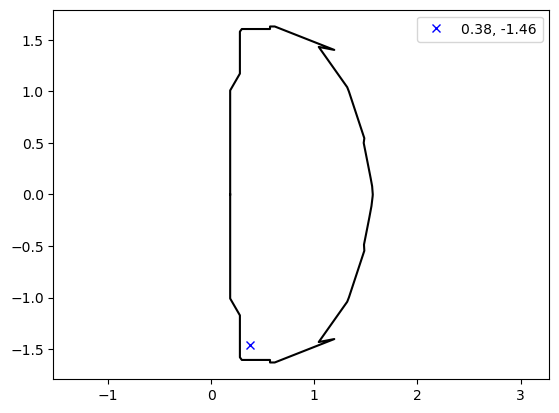

In [45]:
# create a figure and axis
fig, ax = plt.subplots()

x_get_field_lines(R0, Z0, x_dls, ax)

# plot with contour
#ax.contour(xx, yy, psi, levels=[spline(R0, Z0)[0][0]], colors='b', label='contour')


# plot the wall
ax.plot(lims[0], lims[1], 'k')

plt.legend()
plt.show()

1000000.0